In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
import statsmodels.api as sm


sys.path.append("../EDA")
DATA_PATH = "../instruction/movieReplicationSet.csv"
ALPHA = 0.005
sns.set_theme(style="whitegrid", font_scale=1.1)


import movie_data_formatter as mdf
import movie_rating_gender as mrgy
import general_functions as gf

df = pd.read_csv(DATA_PATH)
df = mdf.clean_data(df)
processed_data = mdf.convert_to_table(df)
processed_data = mrgy.reformat_gender_identity(processed_data)

shrek_df = processed_data[(processed_data['movie_name'] == 'Shrek') & (processed_data['year'] == '2001')].dropna(subset=['rating'])
df_gender = shrek_df[shrek_df['gender_identity'].isin(['Male', 'Female'])]
male_ratings = df_gender[df_gender['gender_identity'] == 'Male']
female_ratings = df_gender[df_gender['gender_identity'] == 'Female']


# Question 3
Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

Since the Non-binary group has only 6 participants, it’s too small for reliable inference and should be excluded from this test.

In [2]:
# after removing na
shrek_df['gender_identity'].value_counts()

# stats for each group 
variance_table = shrek_df.groupby('gender_identity')['rating'].agg(['count', 'mean', 'median', 'var', 'std']).reset_index()
print(variance_table)


  gender_identity  count      mean  median       var       std
0          Female    241  3.082988    3.00  0.680584  0.824975
1            Male    743  3.155451    3.50  0.821827  0.906547
2      Non-binary      6  3.250000    3.25  0.275000  0.524404


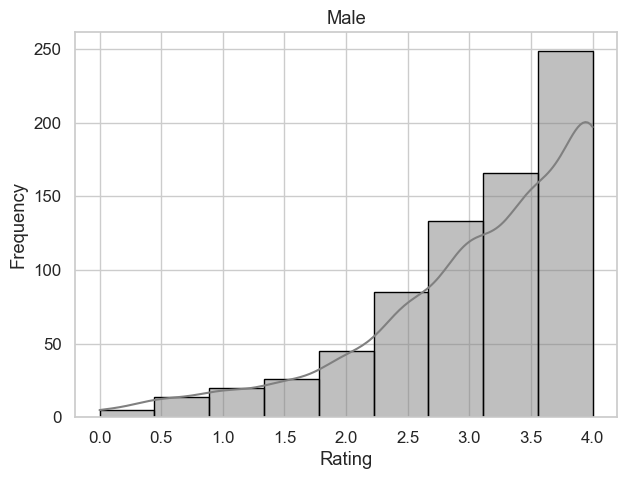

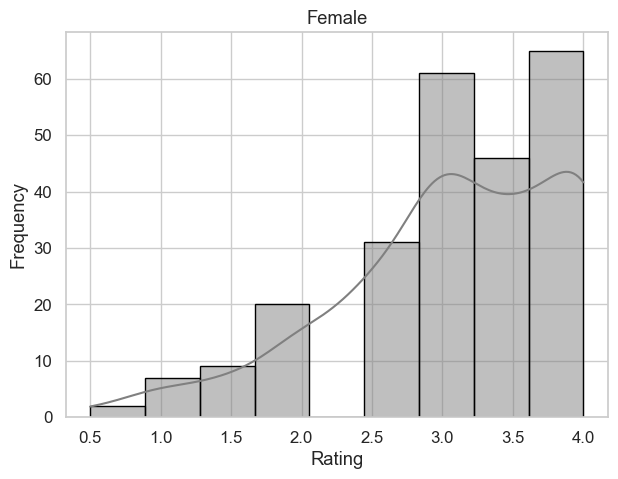

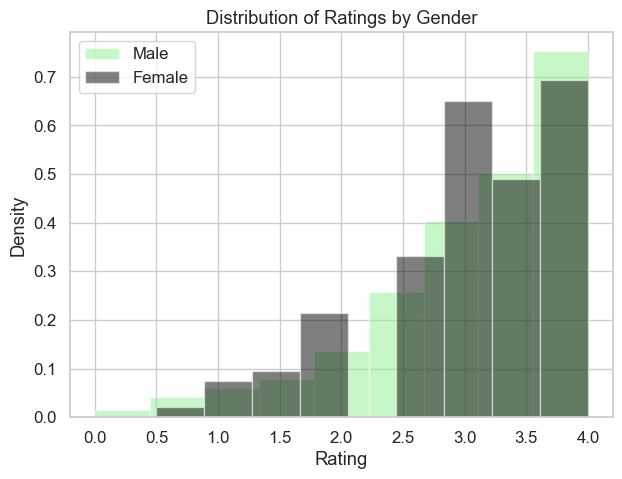

In [3]:
pm = gf.plot_distrubtion(male_ratings, "Male", y='rating', show=False, bins=9)
pm.savefig('../figures/rating_distribution_male.pdf', bbox_inches='tight')

pf = gf.plot_distrubtion(female_ratings, "Female", y='rating', show=False, bins=9)
pf.savefig('../figures/rating_distribution_female.pdf', bbox_inches='tight')

# combine plots top and bottom
# x-axis : 0, 0.5, 1, ..., 4
plt.figure(figsize=(7, 5))

# overlay directly ontop of each other
plt.hist(male_ratings['rating'], bins=9, alpha=0.5, label='Male', color='lightgreen', density=True)
plt.hist(female_ratings['rating'], bins=9, alpha=0.5, label='Female', color='black', density=True)

plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.title('Distribution of Ratings by Gender')

# save to pdf 
plt.savefig('../figures/rating_distribution_gender.pdf', bbox_inches='tight')

# Hypotheses
We compared the ratings of male (n = 743) and female (n = 241) viewers to determine whether enjoyment of Shrek (2001) differs by gender. Both rating distributions were right-skewed, so we used both a parametric (Welch’s t-test) and a non-parametric (Mann–Whitney U test) approach.

A Welch’s t-test indicated that there was no significant difference in ratings of Shrek (2001) between male (M = 3.16) and female (M = 3.08) viewers, t(df about 300) = 1.16, p = .25.
- H0: mean of male = mean of female 
- H1: mean of male is not equal to mean of female

Similarly, a Mann–Whitney U test showed no significant difference in median ratings between genders,
U = 96,830.5, p = .051.
- H0: The distributions of ratings for males and females are identical.
- H1: The distributions of ratings for males and females differ.

These results suggest that enjoyment of Shrek (2001) is not gendered—male and female viewers rated the film similarly.



In [4]:
# Independent t-test (two-sided); Welch's t-test
t_stat, p_t = stats.ttest_ind(male_ratings['rating'], female_ratings['rating'], equal_var=False, alternative='two-sided')
gf.is_p_drop("t-test", t_stat, p_t, stat_testing="mean", alpha=ALPHA)


# Mann–Whitney U test (two-sided)
u_stat, p_u = stats.mannwhitneyu(male_ratings['rating'], female_ratings['rating'], alternative='two-sided')
gf.is_p_drop("Mann–Whitney U test", u_stat, p_u, stat_testing="median", alpha=ALPHA)

t-test: 1.156, p-value: 0.2483
Fail to drop H0 --> No significant difference among means.
Mann–Whitney U test: 96830.500, p-value: 0.0505
Fail to drop H0 --> No significant difference among medians.
